IMAGE TESTER FILE

Use this file to test if the landmarks can be extracted from images in the datasets we use. Some datasets may have poor quality and maybe designed for CNNs and thus landmark extraction will not happen.

In [1]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Function to process and display image with hand landmarks
def process_image_with_landmarks(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Unable to load image at path {image_path}")
        return
    
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize MediaPipe Hands with options
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5) as hands:
        # Process the image to find hands
        results = hands.process(image_rgb)

        # Check if hand landmarks are detected
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks on the image
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Convert the image back to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


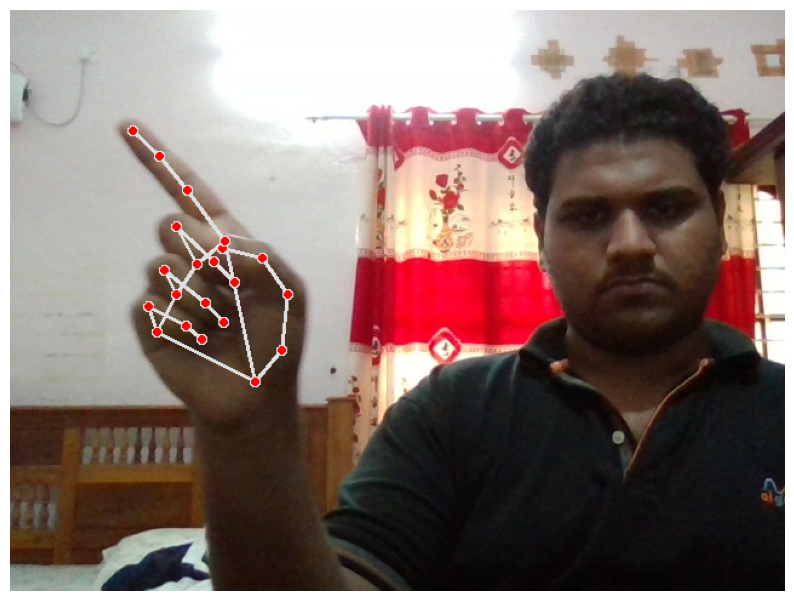

In [4]:
# Provide the path to the image you want to process
image_path = 'asy_dataset/z/240.jpg'  # Replace with your image path
process_image_with_landmarks(image_path)


Test if mediapipe can extract landmarks from images from your webcam 

In [5]:
# Function to process real-time webcam video with hand landmarks
def process_webcam_video():
    # Initialize webcam
    cap = cv2.VideoCapture(0)  # 0 is the default camera index

    # Initialize MediaPipe Hands with options
    with mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
        while cap.isOpened():
            # Capture frame-by-frame
            ret, frame = cap.read()

            if not ret:
                print("Failed to grab frame")
                break

            frame = cv2.flip(frame, 1)
            
            # Convert the frame from BGR to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Process the frame to find hands
            results = hands.process(frame_rgb)

            # Check if hand landmarks are detected
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    # Draw landmarks on the frame
                    mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Display the resulting frame with landmarks
            cv2.imshow('Webcam Feed - Press Q to exit', frame)

            # Exit loop when 'Q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

    # Release the capture and close the window
    cap.release()
    cv2.destroyAllWindows()

    
# Uncomment this to run the webcam video processing
process_webcam_video()